# Suicides Rates Overview
### Dados obtido do link abaixo.
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## Objetivo:
- Analisar visualmente o que pode influenciar a taxa de suícidio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('https://raw.githubusercontent.com/Lessalc/DataScience/master/master.csv')
base.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Alterando o nome das colunas
base.rename(columns = {' gdp_for_year ($) ':'gdp_for_year',
                       'gdp_per_capita ($)':'gdp_per_capita',
                       'suicides/100k pop':'suicides_per_100K',
                       'country-year': 'country_year'},inplace = True)
base.columns = base.columns.str.replace(' ','_')
# Alterando os nomes na coluna age
base.age = base.age.str.replace('5-14 years','05-14_years')
base.age = base.age.str.replace(' ','_')

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides_per_100K    27820 non-null float64
country_year         27820 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         27820 non-null object
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# Alterando od dados do PIB para numérico
base.gdp_for_year= pd.to_numeric(base.gdp_for_year.str.replace(',',''), errors='coerce')

### Primeiras Observações
- Gráfico 01 - Difícil ver uma tendência clara ao longo do tempo. Taxa de suícidio maior em homens do que mulheres, idades mais avançadas tendem a cometer mais suícidio
- Gráfico 02 - Aparenta a medida que cresce o PIB decai a taxa de suícidio. Uma visível melhora na taxa dos mais idosos com o crescimento do PIB. Talvez um sistema previdenciario melhor (Correlação não é causalidade, não podemos tirar grandes conclusões com tão pouco).
- Gráfico 03 - Tentativa de ver uma regressão que trouxesse alguma info. Me parece que a regressão pegou como possível PIB per capita < 0, levando a um erro. Gráfico não trouxe nenhuma informação, mantive puramente para mostrar que sempre há erros.
- Gráfico 04 - O modelo de Boxplot trás por faixa etária já melhora bem a percepção. O modelo por si só já classifica outliers, visivelmente podemos ver que há bastante, vale a pena conferir com calma qual motivo. Podemos ver uma correlação clara entre taxa de suícidio e faixa etária, podemos ver com clareza a diferença entre os sexos. Para deixar mais visível iremos fazer o gráfico 05 com as medianas e sexos.

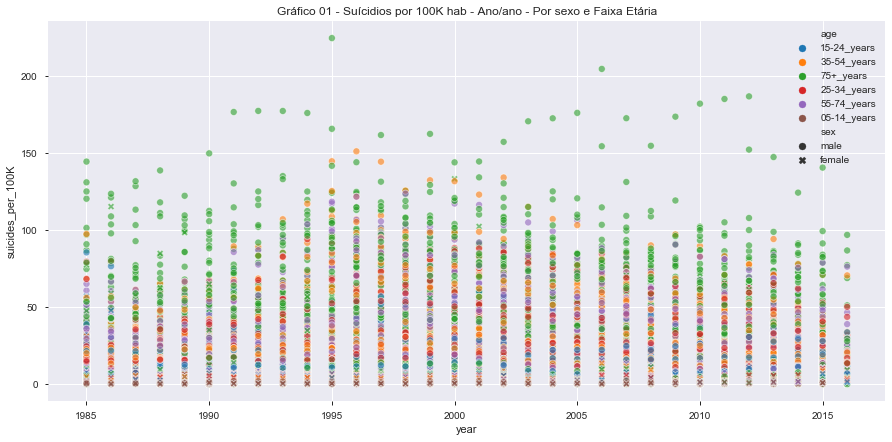

In [6]:
# Como está a evolução do tempo da taxa de suícidio?
plt.figure(figsize=(15,7))
plt.title('Gráfico 01 - Suícidios por 100K hab - Ano/ano - Por sexo e Faixa Etária')
sns.scatterplot('year', 'suicides_per_100K', hue='age', style='sex', alpha=0.6 , data = base)
plt.show()

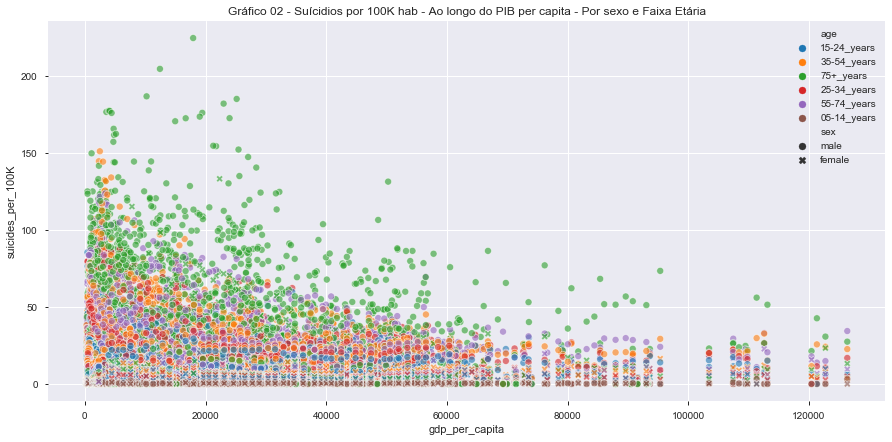

In [7]:
# Como o PIB per capita influencia na taxa de suícidio?
plt.figure(figsize=(15,7))
plt.title('Gráfico 02 - Suícidios por 100K hab - Ao longo do PIB per capita - Por sexo e Faixa Etária')
sns.scatterplot('gdp_per_capita', 'suicides_per_100K', hue='age', style='sex', alpha=0.6 , data = base)
plt.show()

<Figure size 1080x504 with 0 Axes>

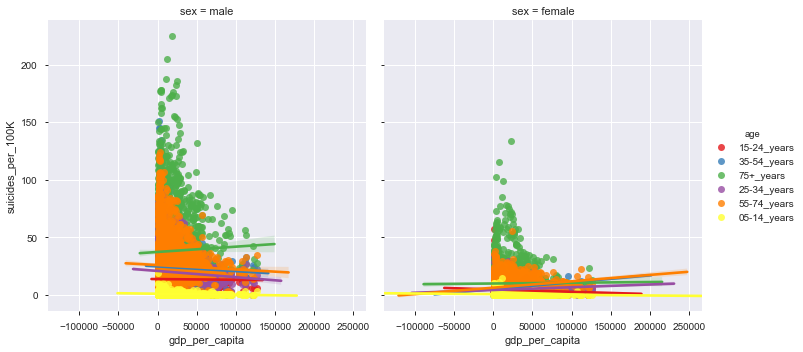

In [9]:
# Repetindo com uma regressão
plt.figure(figsize=(15,7))
sns.lmplot(x='gdp_per_capita',y='suicides_per_100K', data=base, hue='age', col='sex', palette='Set1')
plt.show()

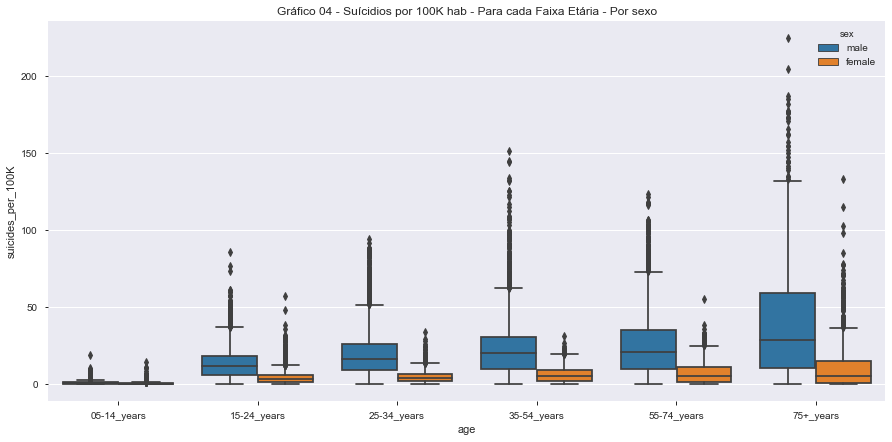

In [10]:
# Como a faixa etária influência
# A fim de deixar os valores em ordem de idade criei outro dataframe ordenando pela coluna "age"
plt.figure(figsize=(15,7))
plt.title('Gráfico 04 - Suícidios por 100K hab - Para cada Faixa Etária - Por sexo')
base_age = base.sort_values('age')
sns.boxplot(x='age', y='suicides_per_100K',hue='sex', data = base_age)
plt.show()

### Gráfico 05, 06, 07 e 08
- Para elaborar esses gráficos geramos dois novos dataframe.
- A ideia é verificar a médiana para cada ano e faixa etária. A mediana é uma medida estatística que separa os conjuntos meio a meio. Mediana difere bastante da média em curvas enviesadas onde os outliers tendem a causar grandes distorções. Ex: 
    - Renda populacional: a média tende a ser maior que a mediana, devido aos valores muito maiores de algumas pessoas. Já valores menores tendem a contribuir menos, por não ser muito discrepante. Se em 10 pessoas, 2 ganham 300/mês, 6 ganham 1200/mês e 2 ganham 5000/mês a mediana é 1200/mês e a média é 1780/mês.
    - Expectativa de vida: a média tende a ser menor, devido a mortalidade infantil. Se 10 pessoas 2 morre aos 2anos 6 aos 70anos e 2 aos 90anos, teremos média 60,4 anos e mediana 70anos
- Gráfico 05 - Parece ter tido um pico entre 1990 e 1995 com uma sequente queda. Preocupa uma virada na inclinação na faixa 55-74 de 2010 em diante.
- Gráfico 06 - Pico entre 90 e 95 com uma sequente queda. Aparente inclinação na tendência nas faixas 55-74 e +75.
- Gráfico 07 e 08 - Mesma representação do 05 e 06, mas na forma de um gráfico de cor, ou gráfico de calor. 

In [11]:
# Criando os dois novos Dataframes
dfmale = pd.DataFrame()
dffemale = pd.DataFrame()

# Lista sobre as quais iremos iterar
idade_lista = list(base.age.unique())
idade_lista.sort()
years = list(base.year.unique())
years.sort()

# Primeiros dados dos Dataframes
dfmale['year'] = years
dffemale['year'] = years

# Gerando a mediana para cada faixa etária ao longo dos anos
for idade in idade_lista:
    suic_media_male = np.zeros(len(base.year.unique()))
    suic_media_female = np.zeros(len(base.year.unique()))
    
    sb = base.loc[base['age'] == idade, :]
    i = 0
    for ano in years:
        sb1 = sb.loc[((sb['year'] == ano)&(sb['sex'] == 'male')), :]
        suic_media_male[i] = np.median(sb1['suicides_per_100K'])
        sb1 = sb.loc[((sb['year'] == ano)&(sb['sex'] == 'female')), :]
        suic_media_female[i] = np.median(sb1['suicides_per_100K'])
        i +=1
    dfmale[idade+'_male'] = suic_media_male
    dffemale[idade+'_female'] = suic_media_female

colunas1 = dfmale.columns[1:]
colunas2 = dffemale.columns[1:]

C:\Users\lucia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\lucia\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


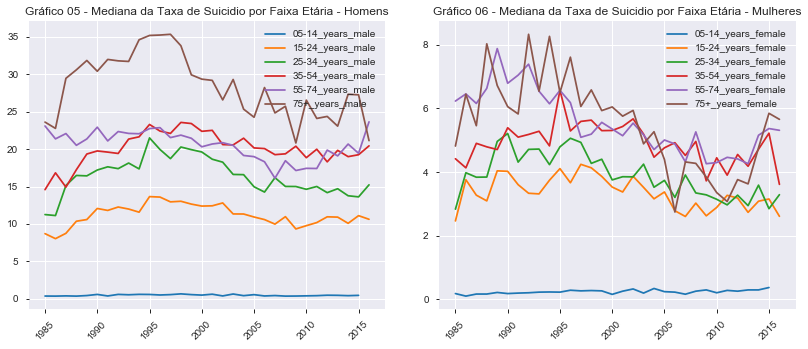

In [12]:
plt.axes([0.05,0.05,0.825,1])
for col in colunas1:
    plt.plot(dfmale['year'], dfmale[col] ,label = col)
plt.title('Gráfico 05 - Mediana da Taxa de Suicidio por Faixa Etária - Homens')
plt.legend()
plt.xticks(rotation=45)

plt.axes([1,0.05,0.825,1])
for col in colunas2:
    plt.plot(dffemale['year'], dffemale[col] ,label = col)
plt.title('Gráfico 06 - Mediana da Taxa de Suicidio por Faixa Etária - Mulheres')
plt.legend()
plt.xticks(rotation=45)
plt.show()

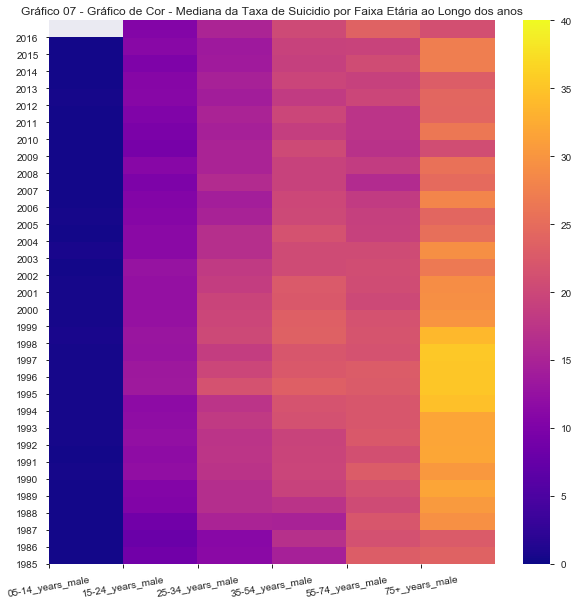

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.title('Gráfico 07 - Gráfico de Cor - Mediana da Taxa de Suicidio por Faixa Etária ao Longo dos anos')
pc= ax.pcolormesh(dfmale.iloc[:,1:], cmap='plasma', vmin=0 , vmax = 40)
plt.yticks(np.arange(0, len(dfmale['year']), 1), dfmale['year'])
plt.xticks(np.arange(0, len(dfmale.columns[1:]), 1), dfmale.columns[1:])
fig.colorbar(pc)
plt.xticks(rotation=10)
plt.show()

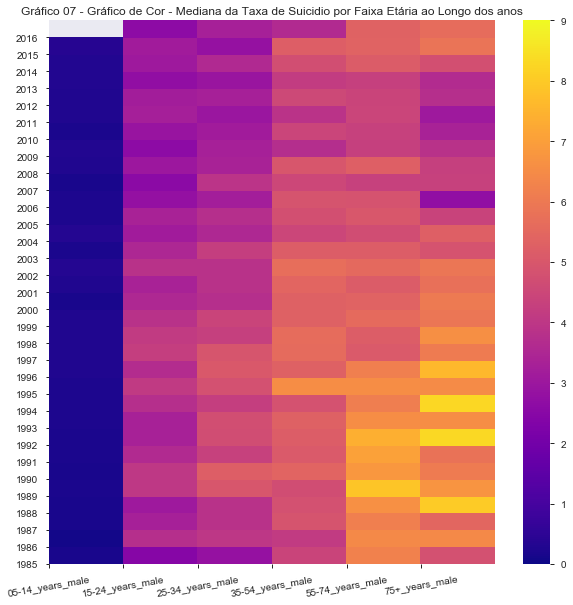

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.title('Gráfico 07 - Gráfico de Cor - Mediana da Taxa de Suicidio por Faixa Etária ao Longo dos anos')
pc= ax.pcolormesh(dffemale.iloc[:,1:], cmap='plasma', vmin=0 , vmax = 9)
plt.yticks(np.arange(0, len(dffemale['year']), 1), dfmale['year'])
plt.xticks(np.arange(0, len(dffemale.columns[1:]), 1), dfmale.columns[1:])
fig.colorbar(pc)
plt.xticks(rotation=10)
plt.show()